In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import astropy.units as u
import astropy.constants as const
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from astropy.coordinates import EarthLocation

Error initializing plugin EntryPoint('Windows (alt)', 'keyrings.alt.Windows', None, Distribution('keyrings.alt', '3.0')).
Traceback (most recent call last):
  File "/home/bassa/.local/lib/python3.6/site-packages/keyring/backend.py", line 188, in _load_plugins
    init_func = ep.load()
  File "/home/bassa/.local/lib/python3.6/site-packages/entrypoints.py", line 82, in load
    mod = import_module(self.module_name)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/u

In [2]:
d = np.loadtxt("ch2.dat")
tobs = Time(d[:, 0], format="mjd", scale="utc")
fobs = d[:, 1]*u.Hz

In [3]:
dwingeloo = EarthLocation(lat="52d48m43.27", lon="6d23m46.21", height="25m")
dwingeloo_jpl = {'lat': dwingeloo.lat.deg, 'lon': dwingeloo.lon.deg, 'elevation': dwingeloo.height.to(u.m).value}

In [4]:
madrid = EarthLocation(lat="40d25m45", lon="-4d14m57", height="720m")
madrid_jpl = {'lat': madrid.lat.deg, 'lon': madrid.lon.deg, 'elevation': madrid.height.to(u.m).value}

In [5]:
tmod = Time("2019-09-06T18:10") + np.linspace(0, 140, 100, endpoint=False)*u.min

In [6]:
ephem_ch2_rx = Horizons(id='Chandrayaan-2 (LANDER spacecraft)', location=dwingeloo_jpl,
                    epochs=list(tmod.jd), id_type='majorbody').ephemerides()

In [7]:
ephem_ch2_tx = Horizons(id='Chandrayaan-2 (LANDER spacecraft)', location=madrid_jpl,
                    epochs=list(tmod.jd), id_type='majorbody').ephemerides()

In [8]:
ephem_moon_rx = Horizons(id='301', location=dwingeloo_jpl,
                      epochs=list(tmod.jd), id_type='majorbody').ephemerides()

In [9]:
ephem_moon_tx = Horizons(id='301', location=madrid_jpl,
                      epochs=list(tmod.jd), id_type='majorbody').ephemerides()

In [10]:
f0 = 2284.538*u.MHz

In [11]:
fch2 = (1.0-ephem_ch2_rx["delta_rate"].to(u.m/u.s)/const.c)*f0

In [12]:
fmoon = (1.0-ephem_moon_rx["delta_rate"].to(u.m/u.s)/const.c)*f0

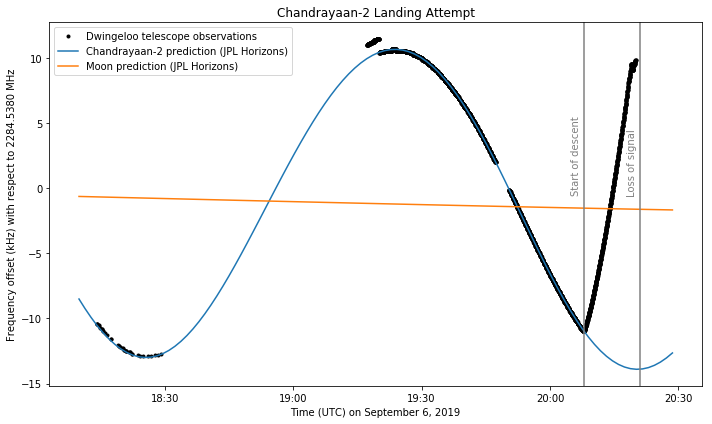

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tobs.datetime, (fobs-f0).to(u.kHz), "k.", label="Dwingeloo telescope observations")
ax.plot(tmod.datetime, (fch2-f0).to(u.kHz), label="Chandrayaan-2 prediction (JPL Horizons)")
ax.plot(tmod.datetime, (fmoon-f0).to(u.kHz), label="Moon prediction (JPL Horizons)")
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_xlabel("Time (UTC) on September 6, 2019")
ax.set_ylabel("Frequency offset (kHz) with respect to %.4f MHz" % (f0.to(u.MHz).value))
ax.set_title("Chandrayaan-2 Landing Attempt")
ax.axvline(Time("2019-09-06T20:08:00", format="isot", scale="utc").datetime, color="gray")
ax.text(Time("2019-09-06T20:05:00", format="isot", scale="utc").datetime, 5, "Start of descent",
        color="gray", rotation="vertical")
ax.axvline(Time("2019-09-06T20:21:00", format="isot", scale="utc").datetime, color="gray")
ax.text(Time("2019-09-06T20:18:00", format="isot", scale="utc").datetime, 4, "Loss of signal",
        color="gray", rotation="vertical")
ax.legend()
plt.tight_layout()
plt.savefig("doppler_curve.png", bbox_inches="tight")

In [14]:
pv_ch2 = Horizons(id='Chandrayaan-2 (LANDER spacecraft)', location='399', 
                       epochs=list(tmod.jd), id_type='majorbody').vectors()

In [15]:
pv_moon = Horizons(id='301', location='399', epochs=list(tmod.jd), id_type='majorbody').vectors()

In [16]:
dx = pv_ch2["x"].to(u.km)-pv_moon["x"].to(u.km)
dy = pv_ch2["y"].to(u.km)-pv_moon["y"].to(u.km)
dz = pv_ch2["z"].to(u.km)-pv_moon["z"].to(u.km)
r = np.sqrt(dx**2+dy**2+dz**2)

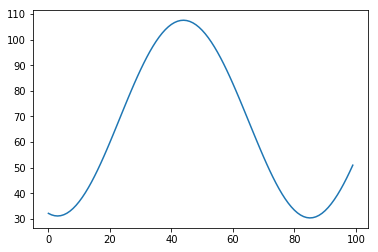

In [17]:
plt.plot(r-1737.4*u.km)

In [18]:
print(np.min(r-1737.4*u.km))
print(np.max(r-1737.4*u.km))

30.426001009315087 km
107.5332306410055 km


In [19]:
from astropy.coordinates import get_moon

In [20]:
get_moon(tmod[0])

<SkyCoord (GCRS: obstime=2019-09-06T18:10:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, km)
    (260.40982136, -21.00421046, 388518.16642324)>